In [ ]:
import pandas as pd

In [ ]:
d_1905 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021CCP/kt_data/data_folder/201905_50CELL_WPOP.csv',sep='|')

In [ ]:
d_1905 = d_1905.sort_values(by=['etl_ymd','timezn_cd','admi_cd','id'])
d_1905 = d_1905.reset_index(drop=True)

In [ ]:
d_1905

,etl_ymd,id,x,y,timezn_cd,admi_cd,m00,m07,m10,m15,m20,m25,m30,m35,m40,m45,m50,m55,m60,m65,m70,m75,m80,m85,f00,f07,f10,f15,f20,f25,f30,f35,f40,f45,f50,f55,f60,f65,f70,f75,f80,f85,total
0,20190501,51764393,314502,553693,0,11230545,0.0,0.0,0.00,0.54,2.22,1.86,0.48,0.48,0.12,0.18,0.42,0.06,0.06,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.12,0.66,0.42,0.18,0.18,0.12,0.24,0.00,0.06,0.12,0.00,0.00,0.00,0.00,0.0,8.52
1,20190501,51764394,314502,553743,0,11230545,0.0,0.0,0.00,0.62,2.57,2.15,0.55,0.55,0.14,0.21,0.49,0.07,0.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.76,0.49,0.21,0.21,0.14,0.28,0.00,0.07,0.14,0.00,0.00,0.00,0.00,0.0,9.86
2,20190501,51764395,314502,553793,0,11230545,0.0,0.0,0.00,0.61,2.51,2.11,0.54,0.54,0.14,0.20,0.48,0.07,0.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.75,0.48,0.20,0.20,0.14,0.27,0.00,0.07,0.14,0.00,0.00,0.00,0.00,0.0,9.66
3,20190501,51764396,314502,553843,0,11230545,0.0,0.0,0.00,0.50,2.07,1.74,0.45,0.45,0.11,0.17,0.39,0.06,0.06,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.11,0.62,0.39,0.17,0.17,0.11,0.22,0.00,0.06,0.11,0.00,0.00,0.00,0.00,0.0,7.96
4,20190501,51776582,314552,553693,0,11230545,0.0,0.0,0.00,0.60,2.46,2.06,0.53,0.53,0.13,0.20,0.47,0.07,0.07,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.13,0.73,0.47,0.20,0.20,0.13,0.27,0.00,0.07,0.13,0.00,0.00,0.00,0.00,0.0,9.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595370,20190531,49728772,306152,550793,23,11440660,0.0,0.0,0.26,1.02,7.91,7.15,4.08,3.57,2.04,1.53,2.04,2.30,1.02,0.51,0.51,0.26,0.0,0.0,0.0,0.0,0.0,1.28,11.23,7.66,2.81,1.02,1.02,0.77,2.55,0.77,1.28,0.51,0.00,0.26,0.26,0.0,65.62
2595371,20190531,49728773,306152,550843,23,11440660,0.0,0.0,0.00,1.77,4.42,4.67,3.16,0.88,0.88,1.26,0.88,0.50,0.38,0.25,0.38,0.00,0.0,0.0,0.0,0.0,0.0,1.51,10.98,5.55,2.52,1.51,0.25,1.14,0.76,0.76,0.00,0.50,0.25,0.00,0.00,0.0,45.16
2595372,20190531,49728774,306152,550893,23,11440660,0.0,0.0,0.00,2.16,5.41,5.71,3.86,1.08,1.08,1.54,1.08,0.62,0.46,0.31,0.46,0.00,0.0,0.0,0.0,0.0,0.0,1.85,13.44,6.80,3.09,1.85,0.31,1.39,0.93,0.93,0.00,0.62,0.31,0.00,0.00,0.0,55.29
2595373,20190531,49740962,306202,550843,23,11440660,0.0,0.0,0.00,3.36,8.40,8.87,6.00,1.68,1.68,2.40,1.68,0.96,0.72,0.48,0.72,0.00,0.0,0.0,0.0,0.0,0.0,2.88,20.87,10.55,4.80,2.88,0.48,2.16,1.44,1.44,0.00,0.96,0.48,0.00,0.00,0.0,85.89


In [ ]:
d_1905['admi_cd'].value_counts()

11410585    658286
11440660    489770
11440655    343218
11230545    328169
11230740    288213
11440600    281885
11230710    205834
Name: admi_cd, dtype: int64

In [ ]:
# 11410585(신촌동) 11440660(서교동) 11440655(서강동) 11230545(제기동)
# 11230740(이문1동) 11440600(대흥동) 11230710(회기동)
# 대흥 신촌 / 서교 서강 / 제기 / 회기 이문1동

In [ ]:
#

In [ ]:
#!pip install geopandas
#import geopandas as gpd
df3 = gpd.GeoDataFrame(df3, geometry='geometry')
print(df3.crs)

In [ ]:
from fiona.crs import from_string
epsg5181_qgis = from_string("+proj=tmerc +lat_0=38 +lon_0=127 +k=1 +x_0=200000 +y_0=500000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")

In [ ]:
#

In [ ]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

In [ ]:
x1 ,y1 = 1,2
x2, y2 = 2,2
x3, y3 = 2,3
x4, y4 = 1,3

In [ ]:
#Point([x1,y1])
#LineString([(x1,y1),(x3,y3)])
#Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])
Polygon(sorted([(x1,y1),(x2,y2),(x4,y4),(x3,y3)]))

In [ ]:
import matplotlib.pyplot as plt

point = Point([x1,y1])
line = LineString([(x1,y1),(x3,y3)])
polygon = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

ax = gpd.GeoSeries(polygon).plot(color='black', alpha=0.5)
gpd.GeoSeries(line).plot(ax=ax, linewidth=3, color='white')
gpd.GeoSeries(point).plot(ax=ax, color='red', markersize=100)
plt.axis('off')
plt.show()
#print(point.geom_type)
#print(line.geom_type)
#print(polygon.geom_type)

In [ ]:
#

In [ ]:
df3 = d_1905[:200].copy()

In [ ]:
# 단순 데이터프레임을 공간데이터로 만들기

df3['x'] = df3['x'].astype(float)  # 경도
df3['y'] = df3['y'].astype(float)  # 위도
df3['geometry'] = df3.apply(lambda row : Point([row['x'], row['y']]), axis=1)
df3 = gpd.GeoDataFrame(df3, geometry='geometry')

In [ ]:
print(df3[:5])

    etl_ymd        id         x  ...  f85  total                       geometry
0  20190501  51764393  314502.0  ...  0.0   8.52  POINT (314502.000 553693.000)
1  20190501  51764394  314502.0  ...  0.0   9.86  POINT (314502.000 553743.000)
2  20190501  51764395  314502.0  ...  0.0   9.66  POINT (314502.000 553793.000)
3  20190501  51764396  314502.0  ...  0.0   7.96  POINT (314502.000 553843.000)
4  20190501  51776582  314552.0  ...  0.0   9.45  POINT (314552.000 553693.000)

[5 rows x 44 columns]


In [ ]:
print(df3.crs)

None


In [ ]:
df3.crs = {'init':'epsg:5186'}
df3 = df3.to_crs({'init':'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
print(df3[:5])

    etl_ymd        id         x  ...  f85  total                    geometry
0  20190501  51764393  314502.0  ...  0.0   8.52  POINT (127.02978 37.58153)
1  20190501  51764394  314502.0  ...  0.0   9.86  POINT (127.02978 37.58198)
2  20190501  51764395  314502.0  ...  0.0   9.66  POINT (127.02977 37.58243)
3  20190501  51764396  314502.0  ...  0.0   7.96  POINT (127.02977 37.58288)
4  20190501  51776582  314552.0  ...  0.0   9.45  POINT (127.03035 37.58153)

[5 rows x 44 columns]


In [ ]:
from fiona.crs import from_string
#df3.crs = from_string("+proj=tmerc +lat_0=38 +lon_0=127 +k=1 +x_0=200000 +y_0=500000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
#df3.crs = from_string("+proj=tmerc +lat_0=38 +lon_0=127 +k=1 +x_0=300000 +y_0=600000 +ellps=GRS80 +units=m +no_defs")
df3.crs = from_string("+proj=tmerc +lat_0=38 +lon_0=128 +k=0.9999 +x_0=400000 +y_0=600000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43")
df3 = df3.to_crs({'init':'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
print(df3[:5])

    etl_ymd        id         x  ...  f85  total                    geometry
0  20190501  51764393  314502.0  ...  0.0   8.52  POINT (127.16418 37.58268)
1  20190501  51764394  314502.0  ...  0.0   9.86  POINT (127.16418 37.58313)
2  20190501  51764395  314502.0  ...  0.0   9.66  POINT (127.16419 37.58358)
3  20190501  51764396  314502.0  ...  0.0   7.96  POINT (127.16419 37.58403)
4  20190501  51776582  314552.0  ...  0.0   9.45  POINT (127.16475 37.58268)

[5 rows x 44 columns]


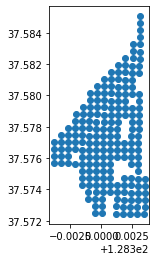

In [ ]:
df3.plot()

In [ ]:
print(df3['geometry'][0:5])

0    POINT (128.296 37.576)
1    POINT (128.296 37.576)
2    POINT (128.296 37.577)
3    POINT (128.296 37.577)
4    POINT (128.297 37.576)
Name: geometry, dtype: geometry


In [ ]:
import folium
m = folium.Map(location=[37.583772, 127.037004], zoom_start=8)
for i in range(len(df3)):
    folium.Marker([df3['geometry'][i].y,df3['geometry'][i].x],tooltip=df3['id'][i]).add_to(m)

In [ ]:
m

In [ ]:
##

In [ ]:
df4 = d_1905[350000:350200].copy()

In [ ]:
df4 = df4.reset_index(drop=True)

In [ ]:
df4['x'] = df4['x'].astype(float)  # 경도
df4['y'] = df4['y'].astype(float)  # 위도
df4['geometry'] = df4.apply(lambda row : Point([row['x'], row['y']]), axis=1)
df4 = gpd.GeoDataFrame(df4, geometry='geometry')

In [ ]:
from fiona.crs import from_string
df4.crs = from_string("+proj=tmerc +lat_0=38 +lon_0=128 +k=0.9999 +x_0=400000 +y_0=600000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43")
df4 = df4.to_crs({'init':'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
print(df4[:5])

    etl_ymd        id         x  ...   f85  total                    geometry
0  20190505  52300747  316702.0  ...  0.00   2.26  POINT (127.05447 37.59885)
1  20190505  52300748  316702.0  ...  0.12  18.68  POINT (127.05447 37.59930)
2  20190505  52300751  316702.0  ...  0.00   1.02  POINT (127.05445 37.60065)
3  20190505  52312925  316752.0  ...  0.00  15.98  POINT (127.05510 37.59390)
4  20190505  52312926  316752.0  ...  0.00   3.91  POINT (127.05510 37.59435)

[5 rows x 44 columns]


In [ ]:
print(df4['admi_cd'].unique())

[11230740]


In [ ]:
import folium
m4 = folium.Map(location=[37.583772, 127.037004], zoom_start=8)
for i in range(len(df4)):
    folium.Marker([df4['geometry'][i].y,df4['geometry'][i].x],tooltip=df4['id'][i]).add_to(m4)

In [ ]:
m4